In [1]:
import numpy as np  
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('E:\\Python\\Diploma\\spam.csv')
df = df.iloc[:, :2]
df.columns = ['target','message']

In [3]:
df.head(100)

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
95,spam,Your free ringtone is waiting to be collected....
96,ham,Watching telugu movie..wat abt u?
97,ham,i see. When we finish we have loads of loans t...
98,ham,Hi. Wk been ok - on hols now! Yes on for a bit...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.describe()

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


<AxesSubplot:xlabel='target', ylabel='count'>

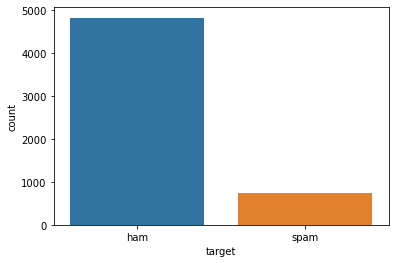

In [41]:
sns.countplot(data = df, x = 'target')

In [42]:
df['target'] = df.target.map({'ham':0, 'spam':1})

In [43]:
import re
import nltk
nltk.download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()


In [44]:
final = []

for i in range(len(df)):
    new = re.sub('[^a-zA-Z]',' ',df['message'][i])
    new = new.lower()
    new = new.split()
    new = [wordnet.lemmatize(word) for word in new if not word in stopwords.words('english')] # List Comprehension
    new = ' '.join(new)
    final.append(new)

In [45]:
# Создадим модель TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)  
x = tfidf.fit_transform(final).toarray()

In [46]:
x.shape

(5572, 5000)

In [47]:
y = pd.get_dummies(df['target'], drop_first = True)


In [48]:
# Train Test Split

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 2022)

In [49]:
# Using the Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB
spam_detection = MultinomialNB().fit(x_train,y_train)

C:\Users\SD\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [50]:
y_pred = spam_detection.predict(x_test)

In [51]:
# Comparing our results

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pred)

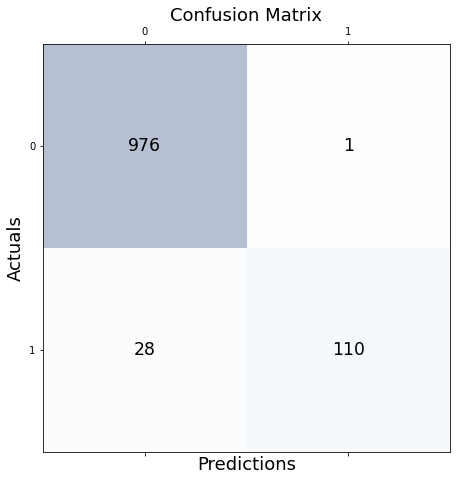

In [52]:
# Print the confusion matrix 

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax.text(x=j, y=i,s=confusion[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [53]:
# Accuracy score

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy score is {}".format(accuracy))

The accuracy score is 0.9739910313901345


In [54]:
# f1_score

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("The f1 score is {}".format(f1))

The f1 score is 0.8835341365461846


In [55]:
from sklearn.svm import SVC

In [56]:
spam_detection2 = SVC(kernel = 'rbf', random_state = 10).fit(x_train,y_train)

C:\Users\SD\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [57]:
y_pred2 = spam_detection2.predict(x_test)

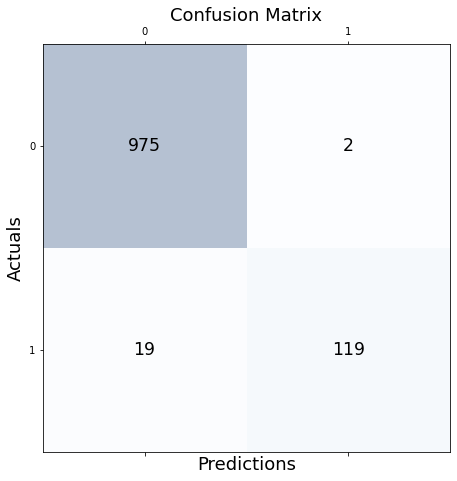

In [58]:
# Print the confusion matrix 
confusion2 = confusion_matrix(y_test,y_pred2)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(confusion2, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion2.shape[0]):
    for j in range(confusion2.shape[1]):
        ax.text(x=j, y=i,s=confusion2[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [59]:
# Accuracy score

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred2)
print("The accuracy score is {}".format(accuracy))

The accuracy score is 0.9811659192825112


In [60]:
# f1_score

from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred2)
print("The f1 score is {}".format(f1))

The f1 score is 0.918918918918919
